In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. One Sample

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [7]:
# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',',
                     skip_header=1)

X = data[:, :4]
y = data[:, -1:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

# shuffle dataset
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:5])
print(y[:5])

[[1.  5.4 3.4 1.7 0.2]
 [1.  5.9 3.2 4.8 1.8]
 [1.  5.4 3.9 1.7 0.4]
 [1.  6.3 3.3 4.7 1.6]
 [1.  6.1 2.8 4.  1.3]]
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [9]:
# Theta 
theta = tf.Variable([[0.01],
                     [-0.04], 
                     [0.02], 
                     [-0.03], 
                     [0.001]], dtype=tf.float64)

# forward
def predict(X, theta):
  return tf.math.sigmoid(X@theta)

In [10]:
# Parameters
lr = 0.1
num_epochs = 5
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [14]:
# Training
for epoch in range(num_epochs):
  for x_train, y_train in zip(X, y):

    x_train = x_train.reshape(1, -1)

    with tf.GradientTape() as t:
      # y_hat
      y_pred = predict(x_train, theta)

      # loss
      loss = loss_fn(y_train, y_pred)

    losses.append(loss)

    # gradient
    dtheta = t.gradient(loss, theta)

    # Update weights
    theta.assign_sub(lr*dtheta)

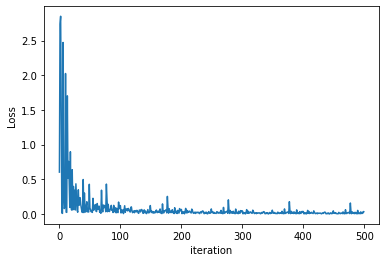

In [15]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

## N samples

In [23]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [42]:
# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',',
                     skip_header=1)

X = data[:, :4]
y = data[:, -1:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

print(X[:5])
print(y[:5])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [46]:
# Theta 
theta = tf.Variable([[0.01],
                     [-0.04], 
                     [0.02], 
                     [-0.03], 
                     [0.001]], dtype=tf.float64)

# forward
def predict(X, theta):
  return tf.math.sigmoid(X@theta)

In [47]:
# parameters
lr = 0.01
num_epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [50]:
# Training
for epoch in range(num_epochs):

  with tf.GradientTape() as t:
    # y_hat
    y_pred = predict(X, theta)

    # loss
    loss = loss_fn(y, y_pred)

  losses.append(loss)

  # gradient
  dtheta = t.gradient(loss, theta)

  # Update weights
  theta.assign_sub(lr*dtheta)

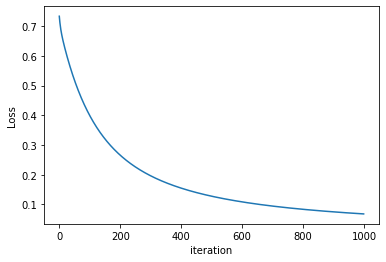

In [51]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()